Twitter Sentiment Analysis: Problem Statement

In this project, we try to implement an NLP Twitter sentiment analysis model that helps to overcome the challenges of sentiment classification of tweets. We will be classifying the tweets into positive or negative sentiments. 

https://www.analyticsvidhya.com/blog/2021/06/twitter-sentiment-analysis-a-nlp-use-case-for-beginners/


Name - Mohd Zaki Mehtab Qureshi <br>
Roll No. - 19CO40<br>
Class - BECO<br>


# **Experiment No. 10**

Develop Content (text, emoticons, image, audio, video) based social media analytics model for business.
(e.g. Content Based Analysis: Topic, Issue, Trend, sentiment/opinion analysis,
audio, video, image analytics)

In [1]:
import re
import numpy as np
import pandas as pd
# plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# nltk
from nltk.stem import WordNetLemmatizer
# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
# Importing the dataset
DATASET_COLUMNS=['target','ids','date','flag','user','text']
DATASET_ENCODING = "ISO-8859-1"
df = pd.read_csv('/content/2022-04-11_2023-04-11_Airbus.csv', encoding=DATASET_ENCODING, names=DATASET_COLUMNS)
df.sample(5)

,,,,,,,,,,,,,target,ids,date,flag,user,text
1550013871762669568,Morning #avgeeks! Who's in for some more #FIA2022 action today? ð https://t.co/vJ69d4t0WE,Airbus,en,"['avgeeks', 'FIA2022']",6,38,577,3,"[Photo(previewUrl='https://pbs.twimg.com/media/FYLBZElX0AQNrdm?format=jpg&name=small', fullUrl='https://pbs.twimg.com/media/FYLBZElX0AQNrdm?format=jpg&name=orig', altText=None)]",7,2022,7,July,21,Thursday,29,2022-07-21,07:04:39
1610312032259022849,Wishing you all a bright ð and successful year ahead! âï¸#happynewyear https://t.co/141lUVot3B,Airbus,en,['happynewyear'],13,83,987,11,"[Photo(previewUrl='https://pbs.twimg.com/media/Flj49E7XEAcUzl7?format=jpg&name=small', fullUrl='https://pbs.twimg.com/media/Flj49E7XEAcUzl7?format=jpg&name=orig', altText=None)]",16,2023,1,January,3,Tuesday,1,2023-01-03,16:28:01
1534563045900529664,"Airbus delivered 47 commercial aircraft in May 2022 #A220 #A320 #A330 #A350. Order-wise, 13 jets were added to our books including one #ACJTwoTwenty.\nLearn more: https://t.co/Dq6k5tdNRX https://t.co/cXo7QR00Dd",Airbus,en,"['A220', 'A320', 'A330', 'A350', 'ACJTwoTwenty']",9,59,368,5,"[Photo(previewUrl='https://pbs.twimg.com/media/FUvcyApWQAI16Pa?format=jpg&name=small', fullUrl='https://pbs.twimg.com/media/FUvcyApWQAI16Pa?format=jpg&name=orig', altText=None)]",15,2022,6,June,8,Wednesday,23,2022-06-08,15:48:35
1514908755548332032,@AirFranceFR ð¤©,Airbus,qme,NaN,0,0,35,0,NaN,10,2022,4,April,15,Friday,15,2022-04-15,10:09:27
1588199571619987456,"The new @AirbusFdn Discovery Space series on Sustainable Aviation Fuel #SAF is your go-to source for all things #AirbusSummit! \nAnd don't worry, it's made for all ages ð½ï¸ð!",Airbus,en,"['SAF', 'AirbusSummit']",3,23,134,0,NaN,16,2022,11,November,3,Thursday,44,2022-11-03,16:00:59


In [3]:
from textblob import TextBlob
def get_subjectivity(text):
  return TextBlob(text).sentiment.subjectivity
def get_polarity(text):
  return TextBlob(text).sentiment.polarity

In [5]:
tweets = pd.read_csv("/content/2022-04-11_2023-04-11_Airbus.csv")
tweets.head(2)

,TweetId,Text,Username,Language,Hashtags,ReplyCount,RetweetCount,LikeCount,QuoteCount,Media,Hour,Year,Month,MonthName,MonthDay,DayName,Week,Date,Time
0,1641446994534338570,📅 It's 3/30 aka #A330 Day! Flying on routes fr...,Airbus,en,"['A330', 'A330']",7,43,254,6,[Video(thumbnailUrl='https://pbs.twimg.com/med...,14,2023,3,March,30,Thursday,13,2023-03-30,14:27:14
1,1641402184444137473,📅 What day is it? It's 3/30 aka #A330 Day! Fin...,Airbus,en,"['A330', 'A330neo', 'Airspace']",9,49,318,8,[Video(thumbnailUrl='https://pbs.twimg.com/med...,11,2023,3,March,30,Thursday,13,2023-03-30,11:29:11


In [6]:
df1 = tweets.copy()
df1['subjectivity'] = df1['Text'].apply(get_subjectivity)
df1['polarity'] = df1['Text'].apply(get_polarity)
df1.head(3)

,TweetId,Text,Username,Language,Hashtags,ReplyCount,RetweetCount,LikeCount,QuoteCount,Media,...,Year,Month,MonthName,MonthDay,DayName,Week,Date,Time,subjectivity,polarity
0,1641446994534338570,📅 It's 3/30 aka #A330 Day! Flying on routes fr...,Airbus,en,"['A330', 'A330']",7,43,254,6,[Video(thumbnailUrl='https://pbs.twimg.com/med...,...,2023,3,March,30,Thursday,13,2023-03-30,14:27:14,0.500000,0.500000
1,1641402184444137473,📅 What day is it? It's 3/30 aka #A330 Day! Fin...,Airbus,en,"['A330', 'A330neo', 'Airspace']",9,49,318,8,[Video(thumbnailUrl='https://pbs.twimg.com/med...,...,2023,3,March,30,Thursday,13,2023-03-30,11:29:11,0.677273,0.318182
2,1641356455637925893,📅 What day is it? It's 3/30 aka #A330 Day! In ...,Airbus,en,['A330'],5,67,414,8,[Video(thumbnailUrl='https://pbs.twimg.com/med...,...,2023,3,March,30,Thursday,13,2023-03-30,08:27:28,0.577778,0.450000


In [7]:
df1['textblob_score'] = df1['Text'].apply(lambda x: TextBlob(x).sentiment.polarity)

In [8]:
neutral_threshold = 0.05

In [9]:
df1['textblob_sentiment'] = df1['textblob_score'].apply(lambda c:'positive' if c >= neutral_threshold else ('Negative' if c <= -(neutral_threshold) else 'Neutral'))

In [10]:
textblob_df = df1[['Text', 'textblob_sentiment', 'LikeCount']]
textblob_df.head()

,Text,textblob_sentiment,LikeCount
0,📅 It's 3/30 aka #A330 Day! Flying on routes fr...,positive,254
1,📅 What day is it? It's 3/30 aka #A330 Day! Fin...,positive,318
2,📅 What day is it? It's 3/30 aka #A330 Day! In ...,positive,414
3,Welcome on board @Lufthansa! Great to see you ...,positive,203
4,What do Airbus and #Paralympic fencer @maximev...,Negative,87


In [11]:
textblob_df["textblob_sentiment"].value_counts()

positive    168
Neutral      37
Negative      7
Name: textblob_sentiment, dtype: int64

<Axes: title={'center': 'Sentiment Analysis'}>

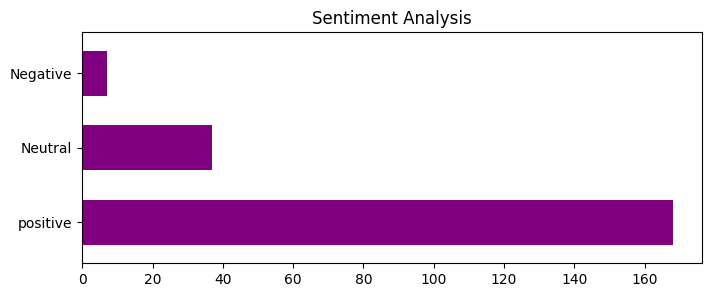

In [12]:
textblob_df["textblob_sentiment"].value_counts().plot.barh(title='Sentiment Analysis', color='purple', width=.6, figsize=(8,3), stacked = True)